## Optimisation et transition énergétique : Comment concilier la croissance mondiale avec une consommation d’énergie durable ?

Objectif :

L’objectif de cette étude est d’examiner l’évolution de la consommation mondiale d’énergie, en mettant particulièrement l’accent sur la répartition entre les énergies fossiles et les énergies renouvelables. L’analyse visera à comprendre les dynamiques de transition énergétique, les défis associés à la réduction de la dépendance aux énergies fossiles, ainsi que les opportunités offertes par le développement des sources d’énergie renouvelables pour assurer un avenir énergétique plus durable.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\Harrison\Downloads\OneDrive_2025-03-28\World energy\projet_v1\World_Energy_Consumption.csv")

data.head(6)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN
5,ASEAN (Ember),2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.02,NaN,0.004,NaN


In [4]:
# suppression des donnée manquantes
data.dropna(inplace=True)

In [5]:
data.head(6)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160
1076,Argentina,2016,ARG,43668236.0,8.283729e+11,5.989,0.906,367.251,16.037,24.503,...,0.007,0.004,-7.749,-0.133,1.465,12.366,0.54,33.555,0.387,0.148


# Distribution de la part des énergies renouvelables dans la production énergétique mondiale

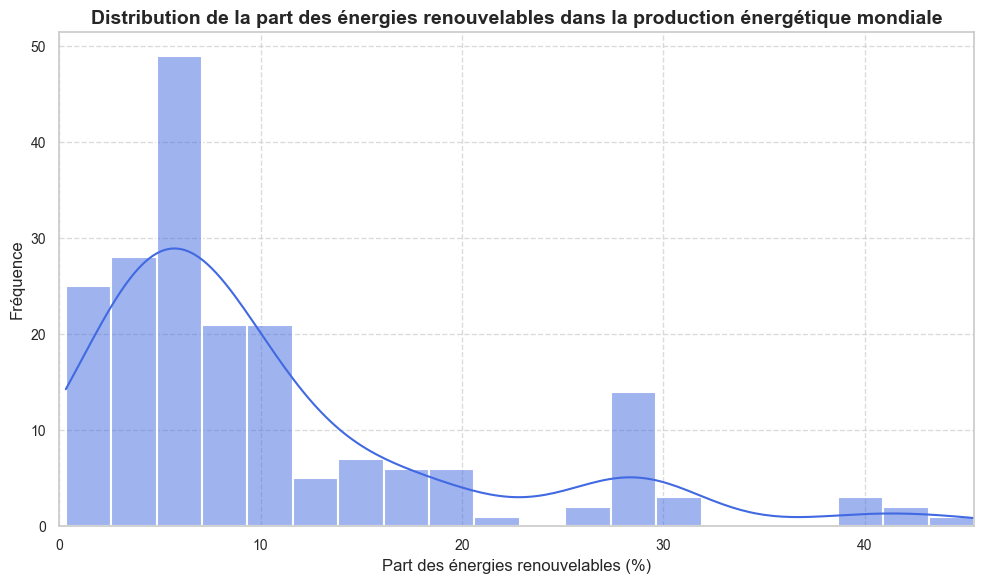

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données à partir de l'année 2000
df_filtered = data[data['year'] >= 2000]

# Garder la colonne de la part des énergies renouvelables
df_dist = df_filtered[['renewables_share_energy']].dropna()

# Créer un graphique plus esthétique et lisible
plt.figure(figsize=(10, 6))  # Augmenter la taille du graphique
sns.set(style="whitegrid")  # Appliquer un style plus net

# Tracer l'histogramme avec la courbe KDE
sns.histplot(df_dist['renewables_share_energy'], kde=True, bins=20, color='royalblue', linewidth=1.5)

# Ajuster les limites de l'axe des X pour qu'elles commencent à 0
plt.xlim(0, df_dist['renewables_share_energy'].max())

# Ajouter un titre avec une taille de police plus grande
plt.title('Distribution de la part des énergies renouvelables dans la production énergétique mondiale', fontsize=14, weight='bold')

# Ajouter des labels pour les axes avec une taille plus grande
plt.xlabel('Part des énergies renouvelables (%)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Ajouter des grilles pour faciliter la lecture
plt.grid(True, linestyle='--', alpha=0.7)

# Améliorer l'apparence des ticks (marques des axes)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Afficher le graphique
plt.tight_layout()  # Ajuster la mise en page pour éviter que les éléments se chevauchent
plt.show()


Ce premier graphique montre que pour la majorité des pays, la part d'exploitation des energies renouvellables n'est que petite (0 à 10%). De nombreux facteurs sont la cause de ces résultats tels que l'emplacement du pays, la richesse du pays, ou encore sa densité de population...

## Relations entre différentes variables qui influencent la consommation énergétique

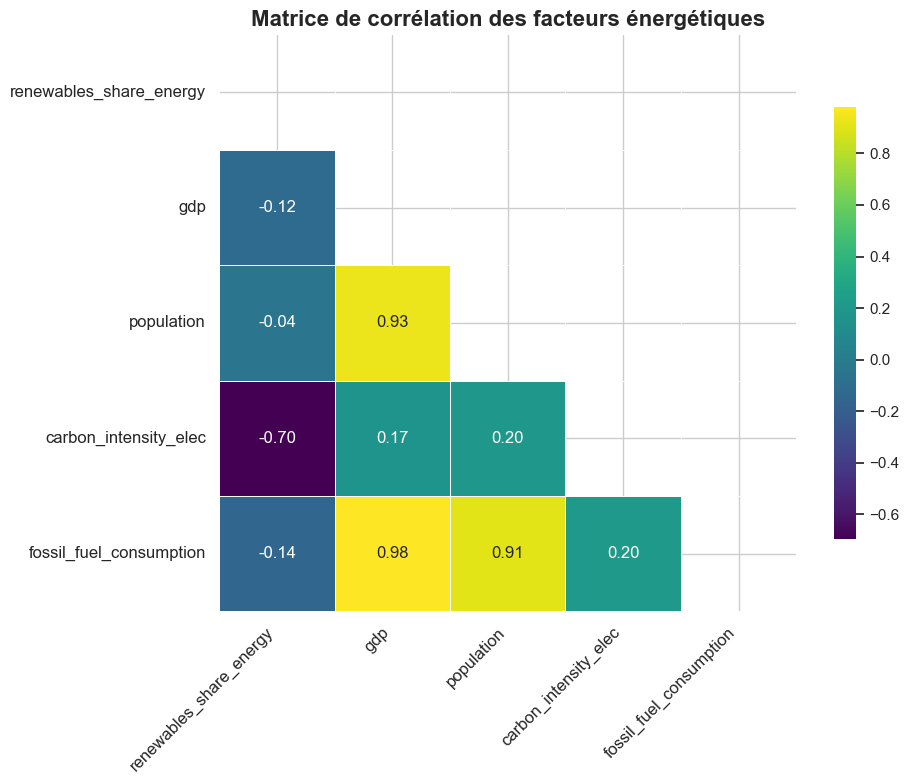

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sélectionner les colonnes pertinentes pour la corrélation
columns = ['renewables_share_energy', 'gdp', 'population', 'carbon_intensity_elec', 'fossil_fuel_consumption']

# Calculer la matrice de corrélation
df_corr = df_filtered[columns].dropna()
corr_matrix = df_corr.corr()

# Masquer la partie supérieure de la matrice de corrélation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Créer un graphique plus esthétique
plt.figure(figsize=(10, 8))  # Augmenter la taille de la figure

# Tracer la heatmap avec une colormap synchronisée
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5, mask=mask, square=True, cbar_kws={'shrink': 0.75})

# Rotation des labels de l'axe des X et Y pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Ajouter un titre plus lisible
plt.title('Matrice de corrélation des facteurs énergétiques', fontsize=16, weight='bold')

# Afficher la heatmap
plt.tight_layout()  # Ajuster l'espacement pour éviter tout chevauchement
plt.show()


Il y a une correlation asseaz forte entre la xonsommation d'energies fossiles et le pib. Plus le pays est grand, habité, plus les citoyens ont de grands besoins en energie. Les energies renouvellables ne fournissent probablement pas suffisamment d'energie alors ces pays ont recours aux energies fossiles. Plus accessibles.

## Part des différentes sources d\'énergie dans la consommation mondiale

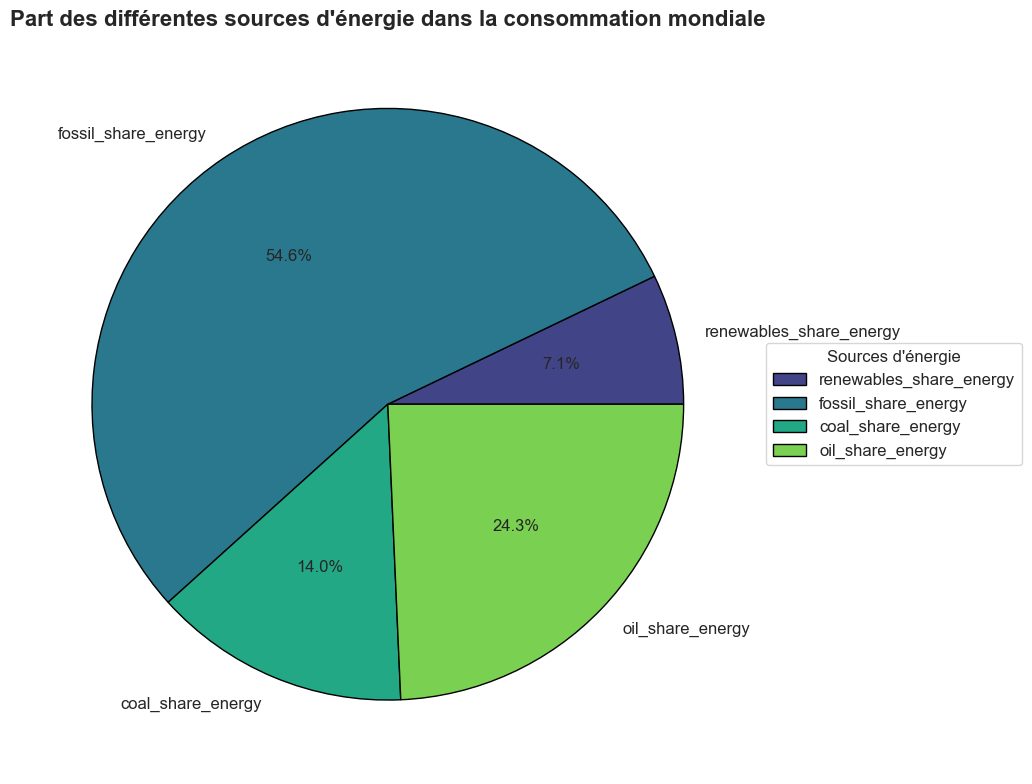

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes pertinentes pour l'énergie (par exemple)
energy_sources = ['renewables_share_energy', 'fossil_share_energy', 'coal_share_energy', 'oil_share_energy']

# Calculer la somme de la consommation par source d'énergie (en prenant la moyenne par pays)
energy_totals = data[energy_sources].mean()

# Créer une palette de couleurs cohérente avec les autres graphiques
colors = sns.color_palette("viridis", n_colors=len(energy_sources))

# Tracer le diagramme circulaire avec des couleurs améliorées
plt.figure(figsize=(10, 8))
energy_totals.plot(kind='pie', autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black'}, fontsize=12)

# Ajouter un titre plus lisible et pertinent
plt.title('Part des différentes sources d\'énergie dans la consommation mondiale', fontsize=16, weight='bold')

# Supprimer le label de l'axe des ordonnées
plt.ylabel('')

# Ajouter une légende pour les sources d'énergie
plt.legend(energy_sources, title="Sources d'énergie", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Afficher le graphique
plt.tight_layout()  # Ajuster la mise en page pour éviter tout chevauchement
plt.show()


Ce pie chart montre que les energies fossiles sont largement plus utilisées dans le monde que les autres sources d'energies et que l'energie renouvellable n'a qu'une part minime. Cela est du au fait que l'exploitation des energies renouvellables n'en est qu'a ses débuts, d'un point de vue technologique et qu'il faut encore l'adapter à tout les pays du monde d'un point de vue géographique et politique. Cela prendra du temps mais il est probable que l'évolution soit présente et que petit à petit cette part va augmenter.

# Carte des 5 pays avec la plus grande part des énergies renouvelables

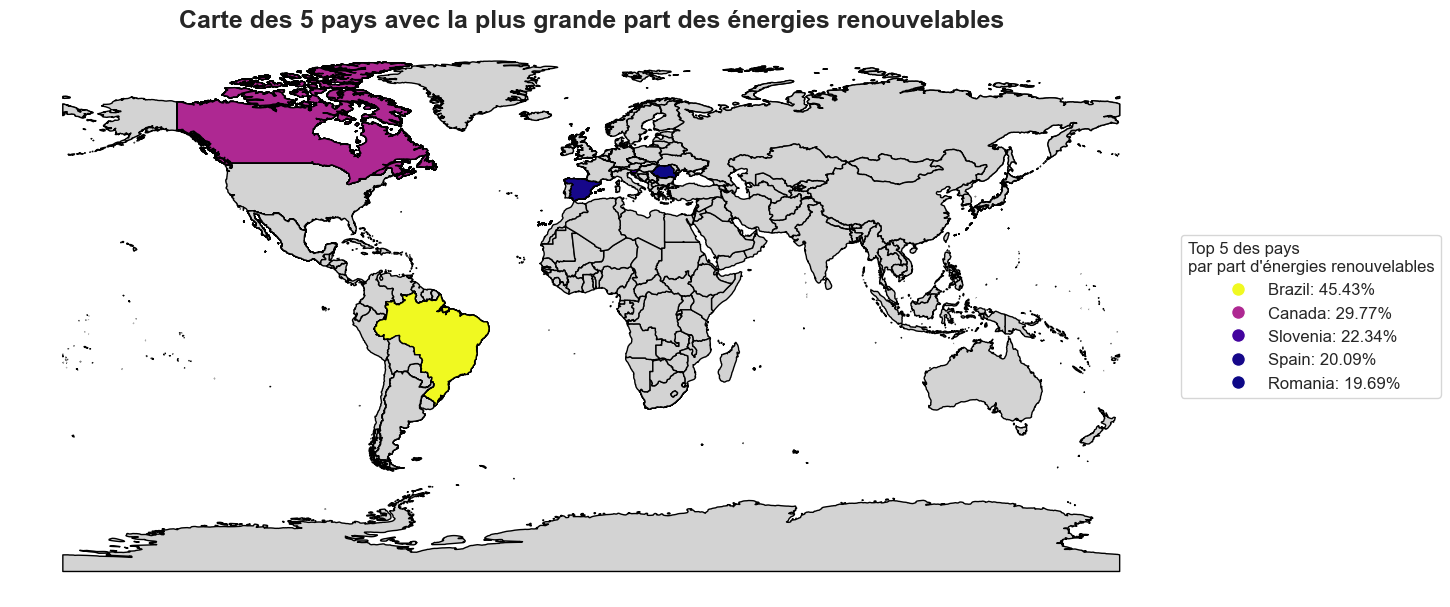

In [41]:
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Charger le shapefile
world = gpd.read_file(r"C:\Users\Harrison\Downloads\OneDrive_2025-03-28\World energy\projet_v1\map\ne_50m_admin_0_countries.shp")

# Fusionner avec df en gardant tous les pays (left join)
world_merged = world.merge(data, left_on='ADMIN', right_on='country', how='left')

# Remplacer les NaN dans 'renewables_share_energy' par 0 pour éviter des erreurs
world_merged['renewables_share_energy'].fillna(0, inplace=True)

# Supprimer les doublons pour ne garder que la ligne avec la plus grande part d'énergie renouvelable par pays
world_max_renewables = world_merged.loc[world_merged.groupby('country')['renewables_share_energy'].idxmax()]

# Filtrer les 5 pays avec la plus grande part des énergies renouvelables
top_5_renewables = world_max_renewables.nlargest(5, 'renewables_share_energy')

# Appliquer une colormap uniquement sur les 5 pays avec des valeurs valides
norm = mpl.colors.Normalize(vmin=top_5_renewables['renewables_share_energy'].min(),
                            vmax=top_5_renewables['renewables_share_energy'].max())
cmap = plt.cm.plasma  # Choisir une colormap fluide et bien visible

# Créer une colonne de couleurs de base pour tous les pays
world_merged['color'] = 'lightgray'

# Appliquer la colormap aux 5 pays
for idx, row in top_5_renewables.iterrows():
    color_value = cmap(norm(row['renewables_share_energy']))
    color_hex = mpl.colors.rgb2hex(color_value)
    world_merged.loc[world_merged['country'] == row['country'], 'color'] = color_hex

# Créer la carte
fig, ax = plt.subplots(figsize=(15, 10))

# Tracer la carte du monde entier avec une coloration personnalisée
world_merged.plot(ax=ax, edgecolor='black', color=world_merged['color'])

# Créer une légende avec les pays et leurs valeurs
handles = []
labels = []
for idx, row in top_5_renewables.iterrows():
    handle = plt.Line2D([0], [0], marker='o', color='w', label=row['country'],
                         markerfacecolor=mpl.colors.rgb2hex(cmap(norm(row['renewables_share_energy']))),
                         markersize=10)
    handles.append(handle)
    labels.append(f"{row['country']}: {row['renewables_share_energy']:.2f}%")

# Ajouter la légende à la carte
ax.legend(handles=handles, labels=labels, title="Top 5 des pays\npar part d'énergies renouvelables", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Ajouter un titre et afficher la carte
plt.title("Carte des 5 pays avec la plus grande part des énergies renouvelables", fontsize=18, fontweight='bold')
plt.axis('off')  # Masquer les axes pour une meilleure présentation

# Afficher la carte
plt.show()

## Évolution de la part des énergies renouvelables dans l'électricité (1995-2020)

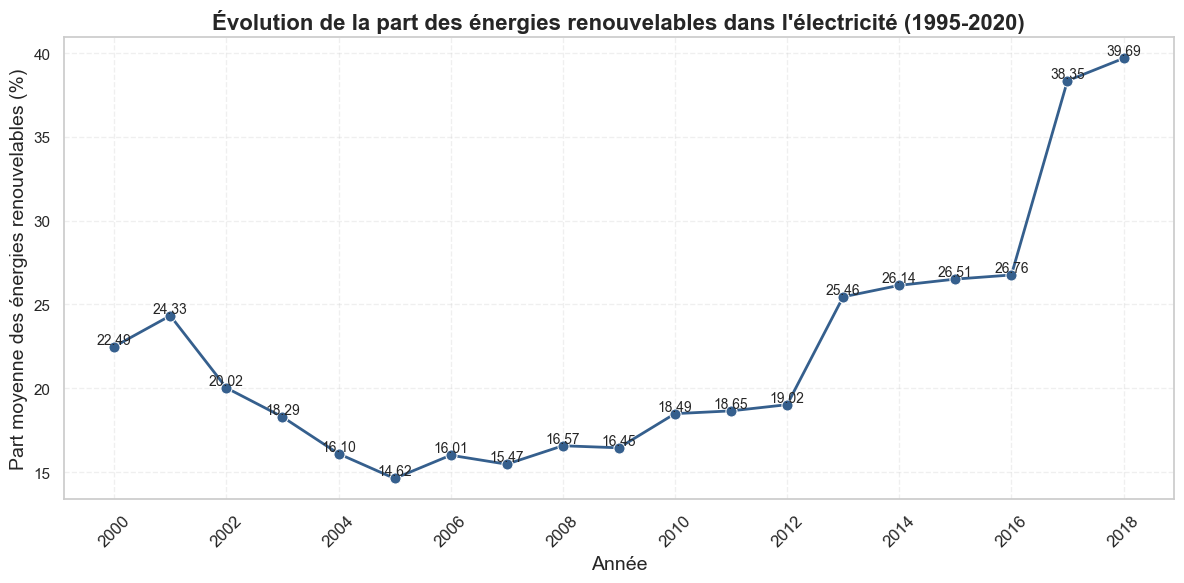

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrer les données entre 1995 et 2020
df = data[(data['year'] >= 1995) & (data['year'] <= 2020)]

# Calculer la moyenne de la part des énergies renouvelables par année
df_grouped = df.groupby('year')['renewables_share_elec'].mean()

# Appliquer la colormap 'viridis' et extraire la couleur correspondante
cmap = plt.cm.viridis  # Choisir la colormap 'viridis'
norm = plt.Normalize(vmin=df_grouped.min(), vmax=df_grouped.max())
line_color = cmap(norm(df_grouped.mean()))  # Extraire une couleur de la colormap

# Créer un graphique avec des améliorations de lisibilité et de style
plt.figure(figsize=(12, 6))

# Tracer la courbe avec la couleur extraite de la colormap
sns.lineplot(x=df_grouped.index, y=df_grouped.values, marker='o', color=line_color, linewidth=2, markersize=8)

# Ajouter un titre plus lisible
plt.title('Évolution de la part des énergies renouvelables dans l\'électricité (1995-2020)', fontsize=16, weight='bold')

# Ajouter les labels pour les axes avec une taille de police plus grande
plt.xlabel('Année', fontsize=14)
plt.ylabel('Part moyenne des énergies renouvelables (%)', fontsize=14)

# Ajouter une grille plus discrète et améliorer la lisibilité
plt.grid(True, linestyle='--', alpha=0.3)

# Ajouter des labels pour les années tous les 2 ans pour éviter le chevauchement
plt.xticks(ticks=df_grouped.index[::2], rotation=45, fontsize=12)

# Ajouter des labels pour les valeurs de la courbe (optionnel)
for i, value in enumerate(df_grouped.values):
    plt.text(df_grouped.index[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Afficher le graphique avec une mise en page améliorée
plt.tight_layout()
plt.show()

## Évolution des parts d'électricité renouvelable vs fossile (1995-2020)

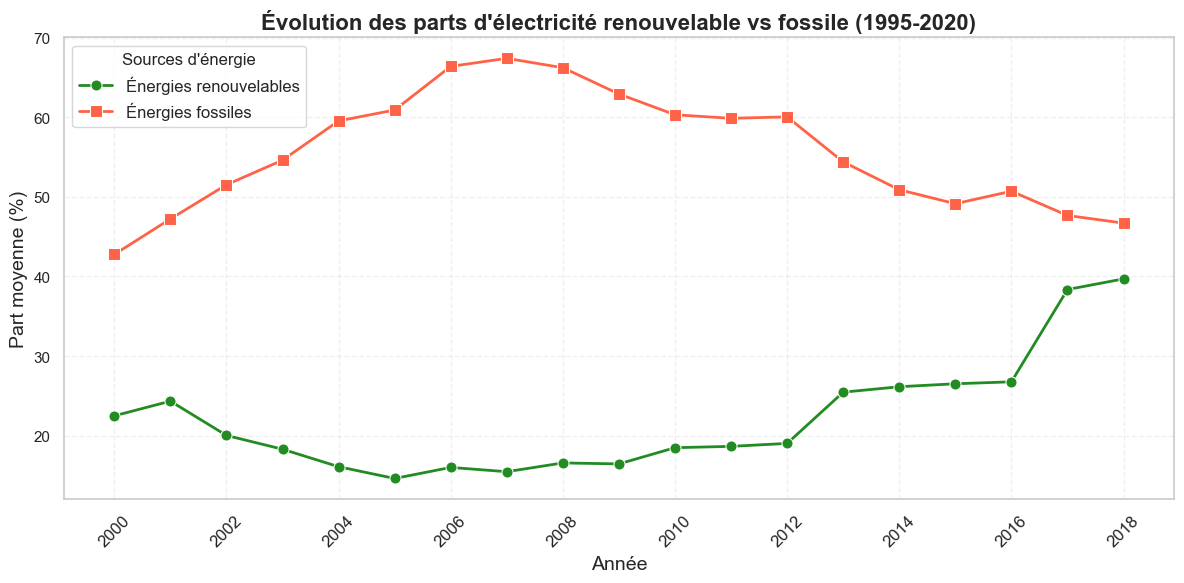

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des parts d'énergies renouvelables et fossiles
df_renewables = data.groupby('year')['renewables_share_elec'].mean()
df_fossil = data.groupby('year')['fossil_share_elec'].mean()

# Créer une figure avec un style amélioré
plt.figure(figsize=(12, 6))

# Tracer les courbes avec des couleurs cohérentes et des styles différents pour chaque ligne
sns.lineplot(x=df_renewables.index, y=df_renewables.values, marker='o', color='forestgreen', linewidth=2, markersize=8, label='Énergies renouvelables')
sns.lineplot(x=df_fossil.index, y=df_fossil.values, marker='s', color='tomato', linewidth=2, markersize=8, label='Énergies fossiles')

# Ajouter un titre avec une taille de police plus grande
plt.title('Évolution des parts d\'électricité renouvelable vs fossile (1995-2020)', fontsize=16, weight='bold')

# Ajouter des labels pour les axes
plt.xlabel('Année', fontsize=14)
plt.ylabel('Part moyenne (%)', fontsize=14)

# Ajouter une grille plus discrète
plt.grid(True, linestyle='--', alpha=0.3)

# Ajouter une légende avec une meilleure lisibilité
plt.legend(title="Sources d\'énergie", fontsize=12, loc='upper left')

# Ajouter des labels pour les années tous les 2 ans sur l'axe des X pour éviter le chevauchement
plt.xticks(ticks=df_renewables.index[::2], rotation=45, fontsize=12)

# Ajuster la mise en page pour une meilleure lisibilité
plt.tight_layout()

# Afficher le graphique
plt.show()


On constate un grand écart entre les energies renouvellables et fossiles. Cependant les courbes se rejoignent petit à petit au fil des années. Les mentalités changent et les pays se rendent compte des problèmes liés à l'environnement que causent l'exploitation des energies fossiles.

## Corrélation entre le PIB et la consommation d'énergie

C:\Users\Harrison\AppData\Local\Temp\ipykernel_15032\3341753353.py:9: UserWarning:


The palette list has fewer values (10) than needed (19) and will cycle, which may produce an uninterpretable plot.



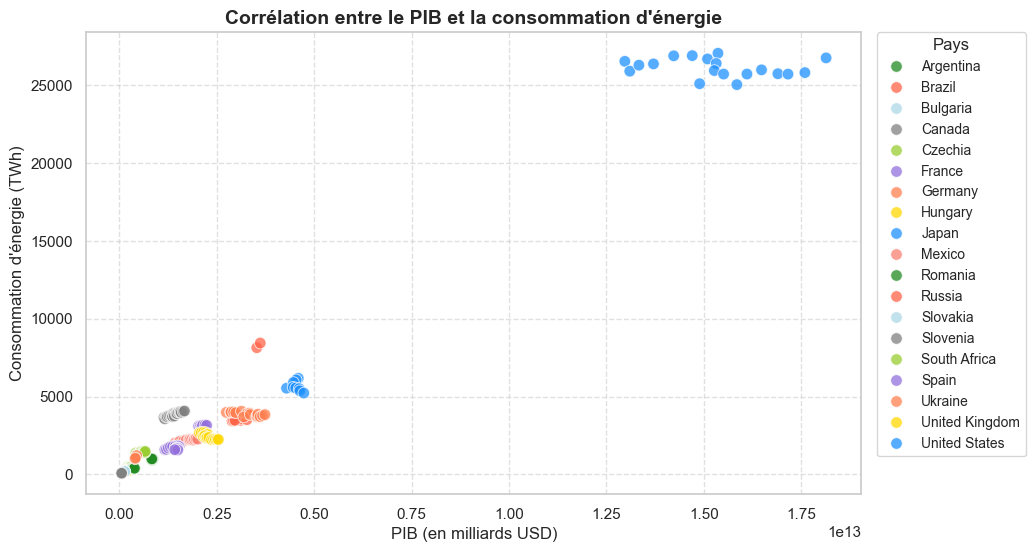

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres d'affichage
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Création du scatterplot
scatter = sns.scatterplot(
    data=data, 
    x="gdp", 
    y="primary_energy_consumption", 
    hue="country", 
    alpha=0.75, 
    s=70,  # Taille des marqueurs
    palette=["forestgreen", "tomato", "lightblue", "gray", "yellowgreen", "mediumpurple", "coral", "gold", "dodgerblue", "salmon"]  # Palette de couleurs harmonisée
)

# Titres et labels
plt.title("Corrélation entre le PIB et la consommation d'énergie", fontsize=14, fontweight="bold")
plt.xlabel("PIB (en milliards USD)", fontsize=12)
plt.ylabel("Consommation d'énergie (TWh)", fontsize=12)

# Personnalisation de la grille
plt.grid(True, linestyle="--", alpha=0.6)

# Déplacement et amélioration de la légende
plt.legend(title="Pays", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=10)

plt.show()

Le pib ne semble pas avoir une grande influence sur la consommation d'energie dans le monde.

## Diagramme Alluvial de la Consommation d'Energie par Type (1995-2020)

In [32]:
import plotly.graph_objects as go

# Filtrer les données à partir de 1995
df = data[data['year'] >= 1995]

# Extraire les années et les parts moyennes des différentes énergies par pays
df_avg = df.groupby(['year'], as_index=False).agg({
    'renewables_share_energy': 'mean',
    'fossil_share_energy': 'mean',
    'biofuel_share_energy': 'mean',
    'coal_share_energy': 'mean',
    'gas_share_energy': 'mean',
    'nuclear_share_energy': 'mean',
    'other_renewables_share_energy': 'mean'
})

# Créer les labels pour les différentes catégories
energy_sources = ['Renouvelables', 'Non Renouvelables', 'Bioénergie', 'Charbon', 'Gaz', 'Nucléaire', 'Autres Renouvelables']

# Organiser les données de flux par années
flows = {
    'year': df_avg['year'],
    'Renouvelables': df_avg['renewables_share_energy'],
    'Non Renouvelables': df_avg['fossil_share_energy'],
    'Bioénergie': df_avg['biofuel_share_energy'],
    'Charbon': df_avg['coal_share_energy'],
    'Gaz': df_avg['gas_share_energy'],
    'Nucléaire': df_avg['nuclear_share_energy'],
    'Autres Renouvelables': df_avg['other_renewables_share_energy']
}

# Créer le diagramme de flux alluvial avec des couleurs harmonisées
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Renouvelables'],
    mode='lines',
    name='Renouvelables',
    line=dict(color='forestgreen', width=4)  # Couleur harmonisée avec les graphiques précédents
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Non Renouvelables'],
    mode='lines',
    name='Non Renouvelables',
    line=dict(color='tomato', width=4)  # Rouge pour les énergies non renouvelables
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Bioénergie'],
    mode='lines',
    name='Bioénergie',
    line=dict(color='darkorange', width=4)  # Orange pour la bioénergie
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Charbon'],
    mode='lines',
    name='Charbon',
    line=dict(color='saddlebrown', width=4)  # Marron pour le charbon
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Gaz'],
    mode='lines',
    name='Gaz',
    line=dict(color='mediumseagreen', width=4)  # Vert pour le gaz
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Nucléaire'],
    mode='lines',
    name='Nucléaire',
    line=dict(color='gold', width=4)  # Jaune pour le nucléaire
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Autres Renouvelables'],
    mode='lines',
    name='Autres Renouvelables',
    line=dict(color='deepskyblue', width=4)  # Bleu ciel pour les autres renouvelables
))

# Ajouter les titres et les labels
fig.update_layout(
    title="Diagramme Alluvial de la Consommation d'Energie par Type (1995-2020)",
    xaxis_title="Année",
    yaxis_title="Part de Consommation d'Energie (%)",
    font=dict(size=12),
    showlegend=True,
    xaxis=dict(range=[1995, max(flows['year'])]),
    legend_title="Types d'Énergie"
)

# Afficher le graphique
fig.show()


# Tendance mondiale de la consommation énergétique

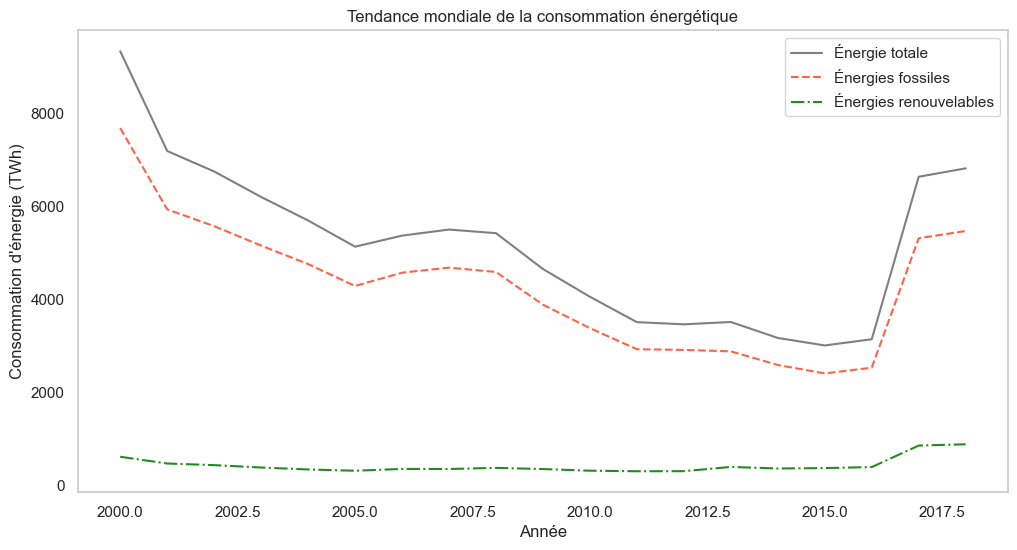

In [33]:
import matplotlib.pyplot as plt

# Calcul des tendances de consommation
trend_energy = data.groupby("year")["primary_energy_consumption"].mean()
trend_fossil = data.groupby("year")["fossil_fuel_consumption"].mean()
trend_renewable = data.groupby("year")["renewables_consumption"].mean()

# Tracer les tendances avec des couleurs harmonisées
plt.figure(figsize=(12, 6))
plt.plot(trend_energy, label="Énergie totale", linestyle="-", color="gray")  # Gris pour l'énergie totale
plt.plot(trend_fossil, label="Énergies fossiles", linestyle="--", color="tomato")  # Rouge pour fossiles
plt.plot(trend_renewable, label="Énergies renouvelables", linestyle="-.", color="forestgreen")  # Vert forêt pour renouvelables

# Ajouter les titres et labels
plt.title("Tendance mondiale de la consommation énergétique")
plt.xlabel("Année")
plt.ylabel("Consommation d'énergie (TWh)")

# Ajouter la légende et la grille
plt.legend()
plt.grid()

# Afficher le graphique
plt.show()
